In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300
import pygal
%matplotlib inline
from IPython.display import SVG, HTML
from datetime import datetime, timedelta
import dateutil.relativedelta
import palettable
from tempfile import NamedTemporaryFile
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import copy

In [5]:
%run ./pygal_custom.py

# Import Dataset

In [6]:
iris = sns.load_dataset('iris')
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


# Boxplots

In [7]:
boxplot_style = copy.copy(custom_style)
# You can edit the copied style like this
# boxplot_style.plot_background='red'

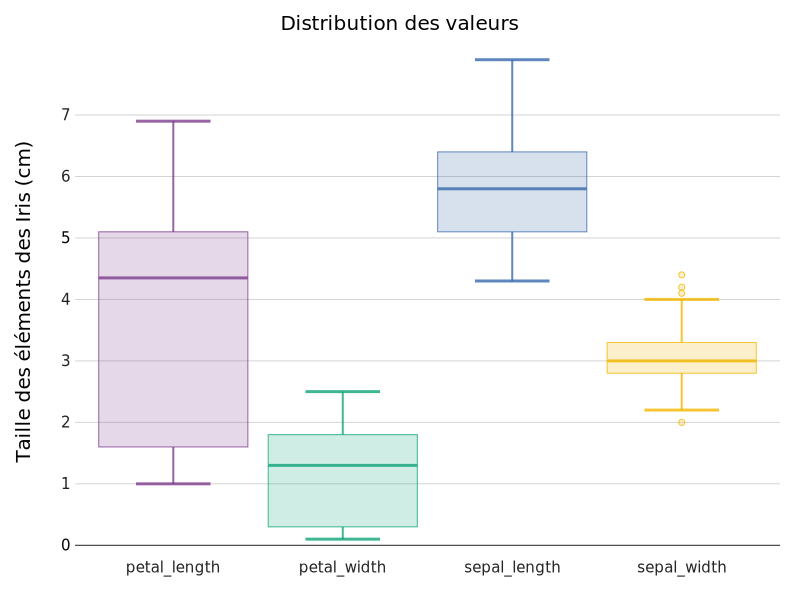

In [8]:
box_plot = pygal.Box(box_mode="tukey",
                     x_label_rotation=0,
                     show_legend=False,
                     config=config,
                     style=boxplot_style
                     )
box_plot.title = 'Distribution des valeurs'
for i in sorted(iris.columns[:-1]):
    box_plot.add(str(i), iris.loc[:, str(i)].dropna(how='all').tolist())
box_plot.x_labels = sorted(iris.columns)
box_plot.y_title = u"Taille des éléments des Iris (cm)"
SVG(box_plot.render())
#box_plot.render_to_file('/PATH/chart.svg')

# Line chart

In [9]:
line_style = copy.copy(custom_style)
# You can edit the copied style like this
# line_style.plot_background='red'

In [10]:
line_chart = pygal.Line(show_legend=False,
                        fill=False,
                        config=config,
                        style=line_style)
line_chart.title = u'Browser usage evolution (in %)'
line_chart.x_labels = map(str, range(2002, 2013))
line_chart.add(u'Firefox', 
               [None, None,    0, 16.6,   25,   31, 36.4, 45.5, 46.3, 42.8, 37.1],
               show_dots=True,
               dots_size=2,
               stroke_style={'width': 2})
line_chart.add(u'Chrome',
               [None, None, None, None, None, None,    0,  3.9, 10.8, 23.8, 35.3],
               show_dots=True,
               dots_size=2,
               stroke_style={'width': 2})
line_chart.add(u'IE',
               [85.8, 84.6, 84.7, 74.5,   66, 58.6, 54.7, 44.8, 36.2, 26.6, 20.1],
               show_dots=True,
               dots_size=2,
               stroke_style={'width': 2})
line_chart.add(u'Others',
               [14.2, 15.4, 15.3,  8.9,    9, 10.4,  8.9,  5.8,  6.7,  6.8,  7.5],
               show_dots=True,
               dots_size=2,
               stroke_style={'width': 2})

galplot(line_chart)
#SVG(line_chart.render())
#line_chart.render_to_file('/PATH/chart.svg')

# Création d'histogramme

In [11]:
hist_style = copy.copy(custom_style)
# You can edit the copied style like this
# line_style.plot_background='red'

## Calcul des données

In [12]:
hist_data, bin_edges = np.histogram(iris.sepal_length)
data = list()
for i in range(len(hist_data)):
    data.append((hist_data[i], bin_edges[i], bin_edges[i+1]))

In [13]:
hist = pygal.Histogram(x_label_rotation=0,
                       config=config,
                       style=hist_style)
hist.title = u'Histogramme de la longueur des sepales'
hist.add('Sepal length', data)
hist.x_labels = bin_edges[:-1]

galplot(hist)